# WSU GLOBAL Student Housing Analysis: A Data-Informed Living Solutions Initiative Project Notebook

# Clean Code

In [4]:
import pandas as pd

# Load the data from the uploaded Excel file
file_path = 'questionnaire responses.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head()

,Timestamp,Are you an international student?,This questionnaire helps the new international students coming to WSU. Do you want to fill this form?,What is your WSU id?,Where are you living currently?,How long have you been in Wichita? (in months),What is your current address?,What is your apartment name? (street name if housing),How many people are staying in your unit?,What is the size of your unit?,...,"What is the approximate duration of time, in minutes, it takes for you to reach your closest grocery store?",What is the approximate duration of time it takes for you to reach your preferred nearby restaurant?,What type of laundry amenities are available in your accommodation?,Where are you currently residing?,"If other, Please specify where you are currently residing at.",How satisfied are you with your current stay?,Any other info/suggestions?,"If other, Please specify your apartment name.","If other, please specify number of people staying with you.",What are all the amenities that are included in your rent?
0,2023-04-20 13:14:12.065,Yes,NaN,b766q849,Apartment,45,NaN,Parc,6,2 bed 2 bath,...,6.0,2,Need to go to other place for this facility,NaN,NaN,NaN,No. It's a secret.,NaN,NaN,"Water/ Sewer, Gas, Trash, Wifi, Pet fee, Parki..."
1,2023-04-20 13:42:54.700,Yes,NaN,E358D825,Apartment,9,"2323 N Woodlawn Blvd, Apt 908",Brickstone,4,2 bed 1.5 bath,...,3.0,3,In the apartment complex,NaN,NaN,NaN,NaN,NaN,NaN,"Gas, Parking"
2,2023-04-20 13:44:03.109,Yes,NaN,R529e468,House you rent,9,3607 E17th St N 67208,Seventeenth,4,1 bed 1 bath,...,10.0,5,In unit/ home,NaN,NaN,NaN,NaN,NaN,NaN,"Trash, Wifi"
3,2023-04-20 13:44:18.952,Yes,NaN,T969G237,Apartment,14,NaN,21W,4,2 bed 1 bath,...,5.0,5,In the apartment complex,NaN,NaN,NaN,NaN,NaN,NaN,"Water/ Sewer, Gas, Trash"
4,2023-04-20 13:44:28.094,Yes,NaN,X923P395,Apartment,20,5400 E 21st Street North,21W,4,2 bed 1 bath,...,5.0,7,In the apartment complex,NaN,NaN,NaN,Be careful and take a picture of your deposit ...,NaN,NaN,"Water/ Sewer, Trash, Parking"


# Exploratory Data Analysis Beginning

In [5]:
# Data Cleaning Process

# Selecting relevant columns for the analysis
columns_of_interest = [
    "Are you an international student?",
    "What is your apartment name? (street name if housing)",
    "What is the total monthly rent of your unit?",
    "Overall, how satisfied are you with your current living?",
    "What is the duration of time it takes you to walk from your residence to the closest transit stop?",
    "What is the duration of time it takes for transit to reach from your stop to the university?",
    "What is the duration of time it takes you to drive from your residence to university?"
]

# Creating a new dataframe with only the relevant columns
cleaned_data = data[columns_of_interest]

# Renaming columns for easier reference
cleaned_data.columns = [
    "International_Student",
    "Apartment_Name",
    "Monthly_Rent",
    "Living_Satisfaction",
    "Walk_Duration_to_Transit",
    "Transit_Duration_to_University",
    "Drive_Duration_to_University"
]

# Handling missing data
# For now, we'll drop rows with missing values in key columns
cleaned_data = cleaned_data.dropna(subset=["Monthly_Rent", "Living_Satisfaction"])

# Converting data types
# Assumption: Rent and satisfaction are numeric
cleaned_data["Monthly_Rent"] = pd.to_numeric(cleaned_data["Monthly_Rent"], errors='coerce')
cleaned_data["Living_Satisfaction"] = pd.to_numeric(cleaned_data["Living_Satisfaction"], errors='coerce')

# Drop rows where conversion to numeric failed
cleaned_data = cleaned_data.dropna(subset=["Monthly_Rent", "Living_Satisfaction"])

# Display the cleaned dataframe
cleaned_data.head()

,International_Student,Apartment_Name,Monthly_Rent,Living_Satisfaction,Walk_Duration_to_Transit,Transit_Duration_to_University,Drive_Duration_to_University
1,Yes,Brickstone,950.0,3.0,NaN,NaN,6.0
2,Yes,Seventeenth,840.0,5.0,NaN,NaN,NaN
3,Yes,21W,750.0,3.0,NaN,NaN,5.0
4,Yes,21W,727.0,3.0,NaN,NaN,NaN
5,Yes,Brickstone,1100.0,5.0,NaN,NaN,NaN


# Address Outliers in Data

In [3]:
# Exploratory Data Analysis (EDA)

# Basic statistical summaries
summary_statistics = cleaned_data.describe()

# Count of international and non-international students
international_student_counts = cleaned_data["International_Student"].value_counts()

# Preparing data for visualizations
# Distribution of Monthly Rent
rent_distribution = cleaned_data["Monthly_Rent"].dropna()

# Distribution of Living Satisfaction
satisfaction_distribution = cleaned_data["Living_Satisfaction"].dropna()

summary_statistics, international_student_counts, rent_distribution.describe(), satisfaction_distribution.describe()

(       Monthly_Rent  Living_Satisfaction  Walk_Duration_to_Transit  \
 count  1.153000e+03          1153.000000              6.420000e+02   
 mean   8.611390e+08             4.117086              1.071289e+27   
 std    2.898763e+10             0.904845              2.714403e+28   
 min    8.000000e+00             1.000000              1.100000e+00   
 25%    8.100000e+02             4.000000              2.000000e+00   
 50%    9.250000e+02             4.000000              5.000000e+00   
 75%    1.050000e+03             5.000000              7.000000e+00   
 max    9.842770e+11             5.000000              6.877677e+29   
 
        Transit_Duration_to_University  Drive_Duration_to_University  
 count                    6.420000e+02                  3.260000e+02  
 mean                     5.332436e+14                  1.741642e+62  
 std                      1.351117e+16                  3.144617e+63  
 min                      2.000000e+00                  1.000000e+00  
 25%

# Regression Analysis

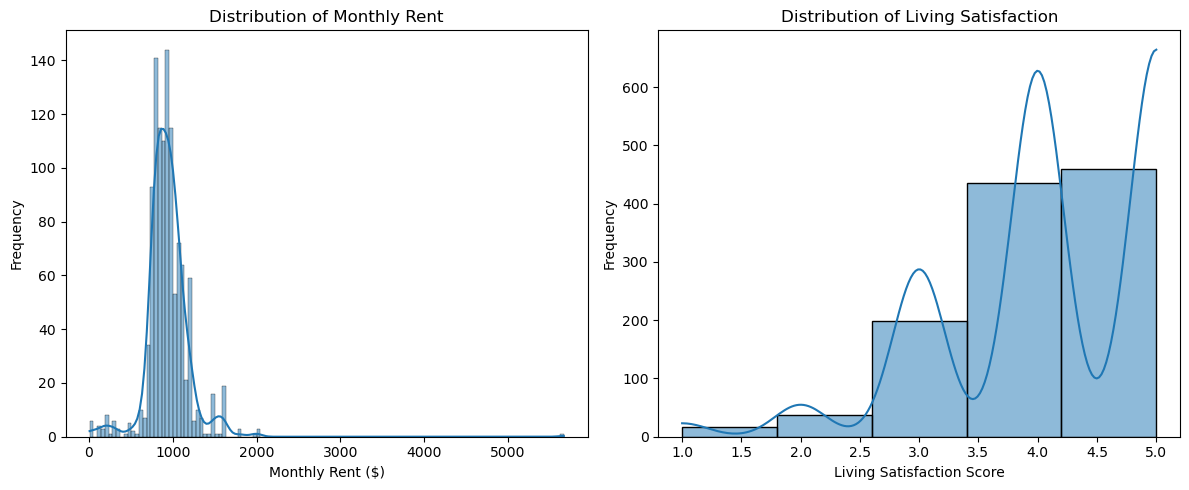

count    1148.000000
mean      940.878336
std       272.878971
min         8.000000
25%       810.000000
50%       925.000000
75%      1047.250000
max      5666.000000
Name: Monthly_Rent, dtype: float64

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Addressing outliers in Monthly Rent
# Assuming that rents above a certain threshold (e.g., $10,000) are outliers
reasonable_rent_threshold = 10000
cleaned_data_filtered = cleaned_data[cleaned_data["Monthly_Rent"] <= reasonable_rent_threshold]

# Updated distribution of Monthly Rent after filtering out outliers
updated_rent_distribution = cleaned_data_filtered["Monthly_Rent"].dropna()

# Plotting the distribution of Monthly Rent and Living Satisfaction
plt.figure(figsize=(12, 5))

# Monthly Rent Distribution
plt.subplot(1, 2, 1)
sns.histplot(updated_rent_distribution, kde=True)
plt.title('Distribution of Monthly Rent')
plt.xlabel('Monthly Rent ($)')
plt.ylabel('Frequency')

# Living Satisfaction Distribution
plt.subplot(1, 2, 2)
sns.histplot(cleaned_data_filtered["Living_Satisfaction"], kde=True, bins=5)
plt.title('Distribution of Living Satisfaction')
plt.xlabel('Living Satisfaction Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Descriptive statistics of the updated rent distribution
updated_rent_distribution.describe()

# Reload Columns for Addition Analysis

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming cleaned_data_filtered is your DataFrame
# ... (your DataFrame initialization code here)

# Selecting additional columns for analysis
additional_columns = [
    "What are your thoughts on the level of safety in the vicinity of your residence?",
    "Where are you living currently?",
    "How long have you been in Wichita? (in months)",
    "Living_Satisfaction"  # Added to the list for convenience
]

# Check which columns exist in the DataFrame
existing_columns = cleaned_data_filtered.columns.tolist()
valid_columns = [col for col in additional_columns if col in existing_columns]

# Adding only the valid columns to the analysis DataFrame
analysis_data = cleaned_data_filtered[valid_columns]

# Convert "How long have you been in Wichita? (in months)" to numeric, if it exists
if "How long have you been in Wichita? (in months)" in valid_columns:
    analysis_data["How long have you been in Wichita? (in months)"] = pd.to_numeric(
        analysis_data["How long have you been in Wichita? (in months)"], errors='coerce'
    )

# Drop rows with missing values in these new columns
analysis_data.dropna(inplace=True)

# Visualization
plt.figure(figsize=(14, 6))

# Safety vs Satisfaction
if "What are your thoughts on the level of safety in the vicinity of your residence?" in valid_columns:
    plt.subplot(1, 3, 1)
    sns.boxplot(x="What are your thoughts on the level of safety in the vicinity of your residence?", y="Living_Satisfaction", data=analysis_data)
    plt.xticks(rotation=45)
    plt.title('Safety vs Living Satisfaction')
    plt.xlabel('Safety Level')
    plt.ylabel('Living Satisfaction Score')

# Type of Residence vs Satisfaction
if "Where are you living currently?" in valid_columns:
    plt.subplot(1, 3, 2)
    sns.boxplot(x="Where are you living currently?", y="Living_Satisfaction", data=analysis_data)
    plt.title('Type of Residence vs Living Satisfaction')
    plt.xlabel('Type of Residence')
    plt.ylabel('Living Satisfaction Score')

# Duration in Wichita vs Satisfaction
if "How long have you been in Wichita? (in months)" in valid_columns:
    plt.subplot(1, 3, 3)
    sns.scatterplot(x="How long have you been in Wichita? (in months)", y="Living_Satisfaction", data=analysis_data, alpha=0.5)
    plt.title('Duration in Wichita vs Living Satisfaction')
    plt.xlabel('Duration in Wichita (months)')
    plt.ylabel('Living Satisfaction Score')

plt.tight_layout()
plt.show()


C:\Users\udeme\AppData\Local\Temp\ipykernel_13264\2103703340.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_data.dropna(inplace=True)


<Figure size 1400x600 with 0 Axes>

# Cleaned Data Columns

In [10]:
cleaned_data_filtered.columns

Index(['International_Student', 'Apartment_Name', 'Monthly_Rent',
       'Living_Satisfaction', 'Walk_Duration_to_Transit',
       'Transit_Duration_to_University', 'Drive_Duration_to_University'],
      dtype='object')

# Display all the Data

{'Monthly_Rent_Distribution': 'Monthly_Rent_Distribution.png',
 'Living_Satisfaction_Distribution': 'Living_Satisfaction_Distribution.png',
 'Rent_vs_Satisfaction': 'Rent_vs_Satisfaction.png',
 'Safety_vs_Satisfaction': '/Safety_vs_Satisfaction.png',
 'Residence_Type_vs_Satisfaction': 'Residence_Type_vs_Satisfaction.png',
 'Duration_in_Wichita_vs_Satisfaction': 'Duration_in_Wichita_vs_Satisfaction.png'}

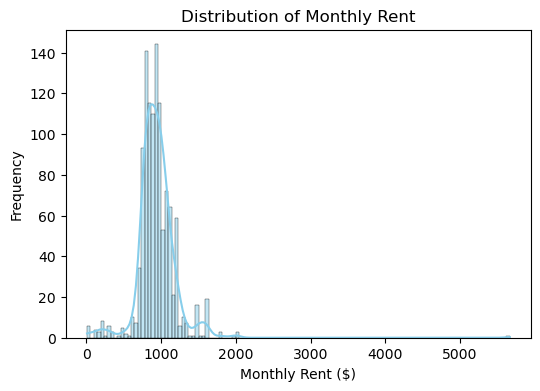

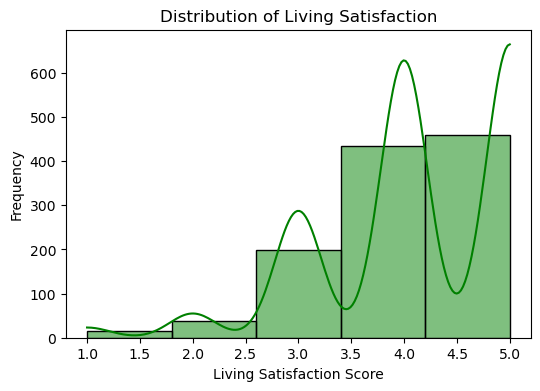

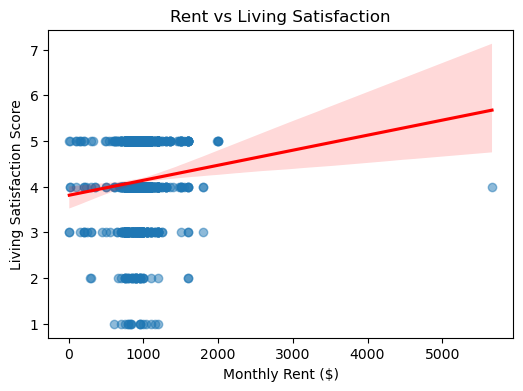

In [12]:
# Creating visualizations for the report

# Visualization 1: Histogram of Monthly Rent
plt.figure(figsize=(6, 4))
sns.histplot(updated_rent_distribution, kde=True, color='skyblue')
plt.title('Distribution of Monthly Rent')
plt.xlabel('Monthly Rent ($)')
plt.ylabel('Frequency')
plt.savefig('Monthly_Rent_Distribution.png')

# Visualization 2: Histogram of Living Satisfaction
plt.figure(figsize=(6, 4))
sns.histplot(cleaned_data_filtered["Living_Satisfaction"], kde=True, bins=5, color='green')
plt.title('Distribution of Living Satisfaction')
plt.xlabel('Living Satisfaction Score')
plt.ylabel('Frequency')
plt.savefig('Living_Satisfaction_Distribution.png')

# Visualization 3: Scatter plot of Rent vs Satisfaction with regression line
plt.figure(figsize=(6, 4))
sns.regplot(x='Monthly_Rent', y='Living_Satisfaction', data=cleaned_data_filtered, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title('Rent vs Living Satisfaction')
plt.xlabel('Monthly Rent ($)')
plt.ylabel('Living Satisfaction Score')
plt.savefig('Rent_vs_Satisfaction.png')

# Check if 'analysis_data_with_additional' is defined and has the required columns
if 'analysis_data_with_additional' in locals() and 'Safety_Thoughts' in analysis_data_with_additional.columns:
    # Visualization 4: Box plot of Safety perceptions vs Living Satisfaction
    plt.figure(figsize=(6, 4))
    sns.boxplot(x="Safety_Thoughts", y="Living_Satisfaction", data=analysis_data_with_additional, palette="Set2")
    plt.xticks(rotation=45)
    plt.title('Safety Perceptions vs Living Satisfaction')
    plt.xlabel('Safety Level')
    plt.ylabel('Living Satisfaction Score')
    plt.savefig('Safety_vs_Satisfaction.png')

if 'analysis_data_with_additional' in locals() and 'Residence_Type' in analysis_data_with_additional.columns:
    # Visualization 5: Box plot of Type of Residence vs Living Satisfaction
    plt.figure(figsize=(6, 4))
    sns.boxplot(x="Residence_Type", y="Living_Satisfaction", data=analysis_data_with_additional, palette="Set3")
    plt.title('Type of Residence vs Living Satisfaction')
    plt.xlabel('Type of Residence')
    plt.ylabel('Living Satisfaction Score')
    plt.savefig('Residence_Type_vs_Satisfaction.png')

if 'analysis_data_with_additional' in locals() and 'Duration_in_Wichita' in analysis_data_with_additional.columns:
    # Visualization 6: Scatter plot of Duration in Wichita vs Living Satisfaction
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x="Duration_in_Wichita", y="Living_Satisfaction", data=analysis_data_with_additional, alpha=0.5, color='purple')
    plt.title('Duration in Wichita vs Living Satisfaction')
    plt.xlabel('Duration in Wichita (months)')
    plt.ylabel('Living Satisfaction Score')
    plt.savefig('Duration_in_Wichita_vs_Satisfaction.png')

# File paths for the saved visualizations
visualization_file_paths = {
    'Monthly_Rent_Distribution': 'Monthly_Rent_Distribution.png',
    'Living_Satisfaction_Distribution': 'Living_Satisfaction_Distribution.png',
    'Rent_vs_Satisfaction': 'Rent_vs_Satisfaction.png',
    'Safety_vs_Satisfaction': '/Safety_vs_Satisfaction.png',
    'Residence_Type_vs_Satisfaction': 'Residence_Type_vs_Satisfaction.png',
    'Duration_in_Wichita_vs_Satisfaction': 'Duration_in_Wichita_vs_Satisfaction.png'
}

visualization_file_paths